# Introduction to Machine Learning in Astronomy: Part 1
Written by Aayush Arya (version: Aug 27, 2023)

See the accompanying video lecture for the technical background

![Classification](Classification_Clustering.png)

This problem seems trivial, but has a lot of useful lessons to illustrate. 

The $x$ and $y$ quantities could be phase space coordinates, or color index/magnitude. 
We know that in a Hertzsprung-Russell diagram, stars in different evolutionary phases "clump" in different regions. There is indeed then a correlation between position in the HR diagram and luminosity class/evolutionary phase.

![HR Diagram](https://upload.wikimedia.org/wikipedia/commons/6/6b/HRDiagram.png)
Image: Wikipedia

You have been provided with three files: `category_dataset.csv` contains a bunch of $(x,y)$ coordinates with each point having an associated _category_ (in abstract terms, either 0 or 1). You will use this as a dataset for training your classifier.

Then, we'll look at what happens if you ask your network to make a prediction on an $(x,y)$ pair that is very different from what it's already seen (`unseen_test.csv`). 

Finally, I will ask you to train with a dataset that contains both of $(x,y)$ and see how the model's predictability changes further(`extended_training.csv`).

In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

# A method that lets you easily split a dataset into "training" and "test" subsets
from sklearn.model_selection import train_test_split

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

In [3]:
dataset = pd.read_csv('./data/category_dataset.csv')
dataset

,x,y,category
0,-0.504,-0.112,1
1,0.920,-0.332,0
2,-0.804,0.988,0
3,-0.212,0.336,0
4,0.064,0.276,1
...,...,...,...
2424,0.700,-0.636,0
2425,0.704,0.816,1
2426,-0.052,-0.916,1
2427,0.740,0.312,1


You may be wondering what this dataset is

![Block structure](./true_distrib.png)

In [4]:
coords = dataset.drop('category', axis=1) # input
labels = dataset['category'] # true output

coords

,x,y
0,-0.504,-0.112
1,0.920,-0.332
2,-0.804,0.988
3,-0.212,0.336
4,0.064,0.276
...,...,...
2424,0.700,-0.636
2425,0.704,0.816
2426,-0.052,-0.916
2427,0.740,0.312


You need a `Model` class for the network architecture. The class [Sequential](https://keras.io/api/models/sequential/) in `keras` gives you the bones for a simple one that is going to be relevant for us. `Sequential` because one layer is passed on to after the other. For our _feedforward_ or _fully connected_ neural network, this is going to be all we need.

In [5]:
network = Sequential()

network.add(keras.Input(shape=(2,)))
network.add(Dense(6, activation='relu'))
network.add(Dense(8, activation='relu'))

network.add(Dense(1, activation='sigmoid'))

In [6]:
network.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy', keras.metrics.BinaryAccuracy()])

The optimizer's role is to find an optimal path to minimizing the loss function. ADAM is a superior choice (compared to Stochastic Gradient Descent). We encourage to figure out why! (Hint: It's ADAptive. You should read about vanishing/exploding gradients problem.)

In [7]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 8)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 83 (332.00 Byte)
Trainable params: 83 (332.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Apparently, the network summary doesn't show the input shape.

In [8]:
history = network.fit(coords, labels, batch_size=250, epochs=100)

Epoch 1/100


10/10 [==============================] - 2s 6ms/step - loss: 0.6767 - accuracy: 0.4944 - binary_accuracy: 0.4944
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6713 - accuracy: 0.6159 - binary_accuracy: 0.6159
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6663 - accuracy: 0.7312 - binary_accuracy: 0.7312
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6612 - accuracy: 0.7641 - binary_accuracy: 0.7641
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6557 - accuracy: 0.7851 - binary_accuracy: 0.7851
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6500 - accuracy: 0.7892 - binary_accuracy: 0.7892
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6438 - accuracy: 0.7888 - binary_accuracy: 0.7888
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6371 - accuracy: 0.7900 - binary_accuracy: 0.790

10/10 [==============================] - 0s 3ms/step - loss: 0.2256 - accuracy: 0.9391 - binary_accuracy: 0.9391
Epoch 63/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2219 - accuracy: 0.9407 - binary_accuracy: 0.9407
Epoch 64/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2185 - accuracy: 0.9424 - binary_accuracy: 0.9424
Epoch 65/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2149 - accuracy: 0.9436 - binary_accuracy: 0.9436
Epoch 66/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9432 - binary_accuracy: 0.9432
Epoch 67/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9461 - binary_accuracy: 0.9461
Epoch 68/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9502 - binary_accuracy: 0.9502
Epoch 69/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9490 - binary_accuracy: 0.9490
Epoch

In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'binary_accuracy'])

Text(0, 0.5, 'Loss Function - $\\mathcal{L}$')

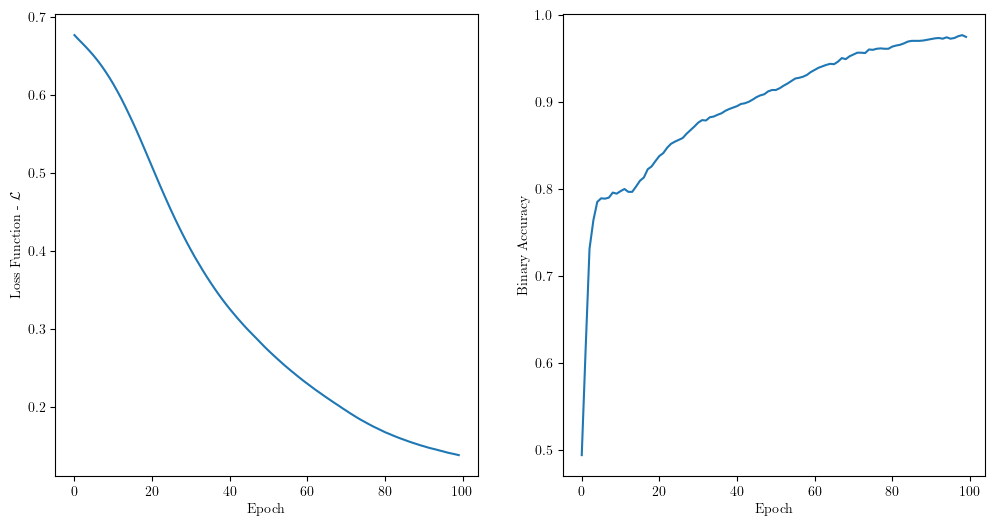

In [10]:
fig2, ax2 = plt.subplots(1, 2, figsize=(12,6))

ax2[1].plot(history.history['binary_accuracy'])
ax2[0].plot(history.history['loss'])
for ax in ax2:
    ax.set_xlabel('Epoch')
ax2[1].set_ylabel('Binary Accuracy')
ax2[0].set_ylabel('Loss Function - $\mathcal{L}$')

I want to see what kind of predictions the network makes across the whole range of $x,y \in [-1, 1]$. Plotting that would make it easy to see what the model is actually learning.

In [11]:
def make_square_grid(min_val=-2, max_val=2):
    x = np.linspace(min_val, max_val, 100)
    y = x
    XX, YY = np.meshgrid(x, y, indexing='xy')

    xx = XX.flatten()
    yy = YY.flatten()
    return pd.DataFrame(data = {'x': xx, 'y': yy})

In [12]:
grid_to_evaluate = make_square_grid(-1, 1)

grid_to_evaluate

,x,y
0,-1.000000,-1.0
1,-0.979798,-1.0
2,-0.959596,-1.0
3,-0.939394,-1.0
4,-0.919192,-1.0
...,...,...
9995,0.919192,1.0
9996,0.939394,1.0
9997,0.959596,1.0
9998,0.979798,1.0


In [13]:
predictions = network.predict(grid_to_evaluate)

313/313 [==============================] - 1s 2ms/step


I also like to test a few examples individually for personal satisfaction, lol

In [14]:
lol = network.predict(np.array([[0.5, 0.5], [-0.5, 0.5]]))

1/1 [==============================] - 0s 114ms/step


In [15]:
lol

array([[0.9557417 ],
       [0.00610722]], dtype=float32)

In [16]:
np.unique(predictions)

array([2.8225195e-06, 2.9976613e-06, 3.1836767e-06, ..., 9.9993646e-01,
       9.9993700e-01, 9.9994212e-01], dtype=float32)

In [17]:
grid_vals = predictions.reshape((100, 100))
#img = XX[:,:, np.newaxis]
#img[:,:,0] = grid_vals

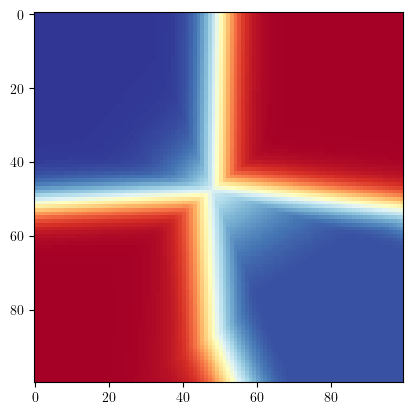

In [18]:
plt.imshow(grid_vals, cmap='RdYlBu')

So far so good. But how well does a network perform when it comes to making predictions for input that differs from the training data.

In [19]:
larger = make_square_grid(-2, 2)

Data points from the true distribution that I didn't include in the first dataset.

In [20]:
unseen_data = pd.read_csv('./data/unseen_test.csv')

In [21]:
grid_vals2 = network.predict(larger).reshape((100, 100))

313/313 [==============================] - 1s 2ms/step


In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(unseen_data['x'], unseen_data['y'], c=unseen_data['category'], ec='k', cmap='RdYlBu')
axes[1].imshow(grid_vals2, cmap='RdYlBu', extent=(-2, 2, -2, 2))
plt.tight_layout()

RuntimeError: Failed to process string with tex because latex could not be found

Error in callback <function _draw_all_if_interactive at 0x0000017C8612AD40> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1200x600 with 2 Axes>

It seems that that the model expected the same behavior to continue.

Here we had just two 2 coordinates and two possible categories. How wrong could the model go if we had hundred input variables and 15 different categories? 

In [24]:
unseen_coords = unseen_data.drop('category', axis=1)
unseen_labels = unseen_data['category']

Let's try training once again, but only with the _outer_ region, cutting out the inner $x, y \in [-1, 1]$

In [25]:
hist2 = network.fit(unseen_coords, unseen_labels, batch_size=250, epochs=50)

Epoch 1/50
7/7 [==============================] - 0s 4ms/step - loss: 4.0327 - accuracy: 0.3663 - binary_accuracy: 0.3663
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 3.4638 - accuracy: 0.3690 - binary_accuracy: 0.3690
Epoch 3/50
7/7 [==============================] - 0s 4ms/step - loss: 2.8532 - accuracy: 0.3914 - binary_accuracy: 0.3914
Epoch 4/50
7/7 [==============================] - 0s 4ms/step - loss: 2.4030 - accuracy: 0.4422 - binary_accuracy: 0.4422
Epoch 5/50
7/7 [==============================] - 0s 3ms/step - loss: 2.1247 - accuracy: 0.4449 - binary_accuracy: 0.4449
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 1.8731 - accuracy: 0.4356 - binary_accuracy: 0.4356
Epoch 7/50
7/7 [==============================] - 0s 4ms/step - loss: 1.6854 - accuracy: 0.4079 - binary_accuracy: 0.4079
Epoch 8/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5391 - accuracy: 0.4218 - binary_accuracy: 0.4218
Epoch 9/50
7/7 [========

In [26]:
new_pred = network.predict(unseen_coords)

48/48 [==============================] - 0s 2ms/step


In [27]:
fig2, ax2 = plt.subplots(figsize=(6,6))
plt.scatter(unseen_coords['x'], unseen_coords['y'], c=new_pred, ec='w', lw=0.4, cmap='RdYlBu')

Error in callback <function _draw_all_if_interactive at 0x0000017C8612AD40> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 600x600 with 1 Axes>

I wonder how intact is the _inner_ region. Let's see for a second

In [28]:
new_prediction = network.predict(larger).reshape((100,100))

plt.imshow(new_prediction, cmap='RdYlBu', extent=(-2, 2, -2, 2))

313/313 [==============================] - 1s 2ms/step


Error in callback <function _draw_all_if_interactive at 0x0000017C8612AD40> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 640x480 with 1 Axes>

This may at first seem demotivating as to how unreliable our (rather simple) neural network is for such a trivial classification task. I would remark that some neural network architectures are more suitable for learning different kinds of information. For example, convolutional neural networks are very useful in image recognition. If you have the image of a handwritten "6", a CNN can pick up its pattern and identify it even if you rotate the image for instance.

Note that you aren't ever restricted to using _just_ a convolutional architecture or a recurrent neural network or some other _named_ class. A real problem may require a combination or even a custom design. 

One of the recent, most powerful use of machine learning in science has been [AlphaFold](https://www.nature.com/articles/s41586-021-03819-2), which was a highlighted breakthrough in protein structure prediction. Look at how specialized their architecture is.  

## Questions:
1. If you actually were to implement such a method for classifying stars, what other things apart from $B-V$ and $V$ would you consider to diminish wrong classifications? (Whether it be additional info from photometry, or any physically motivated idea)
2. Can you guess why ReLU is often a superior activation function compared to sigmoid, for example? Also, could the ReLU be improved? (Hint: Yes!)
3. Is machine learning the optimal solution for this problem?

## Homework:
Take the `extended_training.csv` dataset. It contains $(x,y)$ values covering both the regions we encountered. Train the network with it from scratch. Now try to see what the network predicts for values extending even further out, i.e. $(-3,-3)$ to $(3, 3)$. Does it pick up the recurring pattern this time? Do the results suprise you?

Try truncating the training at 20 epochs or less. Does that help? Were we just overfitting?

If you want to try things for fun to deepen your understanding: What's the effect of changing the number of hidden layers or neurons within a single layer. Intuitively, how is adding more cells to a layer different from more layers in a sequence? (Think of the algebra, maybe?)

## Additional Resources

* [Deep Learning for Physics Research](https://www.google.de/books/edition/Deep_Learning_For_Physics_Research/8dM3EAAAQBAJ?hl=en&gbpv=1&printsec=frontcover)

* Lecture series [Machine Learning for Physicists](https://youtube.com/playlist?list=PLemsnf33Vij4eFWwtoQCrt9AHjLe3uo9_&si=INosux5cpQhzNs-5) taught by Florian Marquardt 
    * Relevant Jupyter notebooks can be found at [the associated GitHub repository](https://github.com/FlorianMarquardt/machine-learning-for-physicists) 